In [1]:
#import libraries
import os
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import math as m
import xlrd
from scipy import stats
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
# set work directory
path = os.getcwd()

In [3]:
# get the train data sets
itrain  = pd.read_excel(str(path) + '/Decision trees_Customer_rating.xlsx')

In [ ]:
# #function to split the train-split data
# def SplitData(predictors,target):
#     """#FUNCTION for Train & Validation set
#     """
#     from sklearn.model_selection import train_test_split
#     X_train, X_valid, y_train, y_valid = train_test_split(predictors, target, test_size=0.3, 
#                                                     random_state = 25)

In [159]:
### ------ Model Function -------------------
###Don't forget to import Classifiers from Sklearn using :  from sklearn.tree/ensemble import DTC/RF/GBM

def TrainModel(Classifier):

    clf = Classifier.fit(X_train, y_train)
    
    #train-prediction
    y_train_pred = Classifier.predict(X_train)
    
    #train score
    from sklearn.metrics import classification_report
    Clf_report_train = classification_report(y_train, y_train_pred)
    print('\n Clf Report on train: \n\n', Clf_report_train)
    
    #accuracy on train
    accuracy = Classifier.score(X_train, y_train)
    print('\n Accuarcy on train %:  ', accuracy * 100)
    
    #Confusion matrix on train set
    #trainCM = pd.crosstab(y_train, y_train_pred)
    #print('\n\n CM on train:') 
    #display(trainCM)
    
    #return Clf_report_train, accuracy, trainCM
    
    
#prediction on validation set

def PredictModel(Classifier):
    
    y_valid_pred = Classifier.predict(X_valid)
    
    #metric report on validation set
    from sklearn.metrics import classification_report
    Clf_report_valid = classification_report(y_valid, y_valid_pred)
    print('\n report on validation data: \n\n', Clf_report_valid)
    
    # accuracy on validation set
    accuracy = Classifier.score(X_valid, y_valid)
    print('\n accuracy on validation data in %:', accuracy * 100)
    
    # creating a confusion matrix on validation set
    testCM = pd.crosstab(y_valid, y_valid_pred)
    print('\n\n CM on validation %: ')
    display(testCM)
    
    #return Clf_report_valid, accuracy, testCM
    

#function to get the feature importances

def featureImp(Classifier):
    features = X_train.columns
    importances = Classifier.feature_importances_
    indices = np.argsort(importances)
    
    fImp_Asc = []
    
    for i in indices:
        n = features[i]
        fImp_Asc.append(n)
        
    plt.figure(figsize=(5,5))
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.title('Feature Importances')
    plt.show()
        
    return fImp_Asc



### Function to get the ROC Curve
def getROC(Classifier):
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    nb_roc_auc = roc_auc_score(y_valid, Classifier.predict(X_valid))
    fpr, tpr, thresholds = roc_curve(y_valid, Classifier.predict_proba(X_valid)[:,1])
    plt.figure(figsize = (4,4))
    plt.plot(fpr, tpr, label='(area = %0.2f)' % nb_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [25]:
dump = ['CURRENT.STAGE','APPLICATION.ID','APPROVED.AMOUNT','APPLICATION.STATUS', 'PRIMARY.ASSET.MODELNO']

predictors = itrain.drop(dump, axis = 1)
target = itrain['APPLICATION.STATUS'].replace({'Approved' : 1, 'Declined' : 0})


labcol = ['QUEUE.ID', 'MARITAL.STATUS', 'GENDER', 'EDUCATION','RESIDENCE.TYPE','EMPLOY.CONSTITUTION', 'PAN.STATUS','STATE',
       'OWN.HOUSE.TYPE', 'PRIMARY.ASSET.CTG','PRIMARY.ASSET.MAKE', 'DSA.ID', 'DEALER.ID','CITY','ZIP.CODE']

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in labcol:
    predictors[i] = le.fit_transform(predictors[i])

Ids = ['VOTER_ID', 'DRIVING_LICENSE', 'AADHAAR', 'PAN', 'BANK_PASSBOOK']
for i in Ids:
    predictors[i] = predictors[i].replace({'T' : 1, 'F' : 0})

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(predictors, target, test_size=0.3, 
                                                    random_state = 25)

### AdaBoost Algorithm


 Clf Report on train: 

              precision    recall  f1-score   support

          0       0.66      0.53      0.59      2331
          1       0.69      0.79      0.74      3100

avg / total       0.68      0.68      0.67      5431


 Accuarcy on train %:   67.9432885288

 report on validation data: 

              precision    recall  f1-score   support

          0       0.65      0.52      0.58       991
          1       0.69      0.79      0.74      1337

avg / total       0.67      0.68      0.67      2328


 accuracy on validation data in %: 67.6546391753


 CM on validation %: 


col_0,0,1
APPLICATION.STATUS,,
0,520,471
1,282,1055


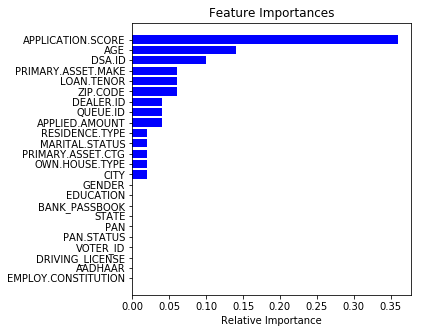

['EMPLOY.CONSTITUTION',
 'AADHAAR',
 'DRIVING_LICENSE',
 'VOTER_ID',
 'PAN.STATUS',
 'PAN',
 'STATE',
 'BANK_PASSBOOK',
 'EDUCATION',
 'GENDER',
 'CITY',
 'OWN.HOUSE.TYPE',
 'PRIMARY.ASSET.CTG',
 'MARITAL.STATUS',
 'RESIDENCE.TYPE',
 'APPLIED.AMOUNT',
 'QUEUE.ID',
 'DEALER.ID',
 'ZIP.CODE',
 'LOAN.TENOR',
 'PRIMARY.ASSET.MAKE',
 'DSA.ID',
 'AGE',
 'APPLICATION.SCORE']

In [160]:
# AdaBoost Algorithm
from sklearn.ensemble import AdaBoostClassifier
clf1 = AdaBoostClassifier() # n_estimators = 50 (default) # base_estimator = DecisionTreeClassifier(default)
TrainModel(clf1)
PredictModel(clf1)
featureImp(clf1)

In [98]:
# from sklearn import tree
# tree.export_graphviz(clf1.estimators_[0], out_file= None)
# #(graph,) = pydot.graph_from_dot_file('tree_from_forest.dot')
# #graph.write_png('tree_from_forest.png')

'digraph Tree {\nnode [shape=box] ;\n0 [label="X[2] <= 0.5\\ngini = 0.49\\nsamples = 5431\\nvalue = [0.429, 0.571]"] ;\n1 [label="gini = 0.462\\nsamples = 3798\\nvalue = [0.253, 0.446]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="gini = 0.485\\nsamples = 1633\\nvalue = [0.176, 0.125]"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n}'

### GBM


 Clf Report on train: 

              precision    recall  f1-score   support

          0       0.71      0.69      0.70      2331
          1       0.77      0.79      0.78      3100

avg / total       0.74      0.75      0.74      5431


 Accuarcy on train %:   74.5166635979

 report on validation data: 

              precision    recall  f1-score   support

          0       0.67      0.65      0.66       991
          1       0.75      0.76      0.76      1337

avg / total       0.72      0.72      0.72      2328


 accuracy on validation data in %: 71.735395189


 CM on validation %: 


col_0,0,1
APPLICATION.STATUS,,
0,649,342
1,316,1021


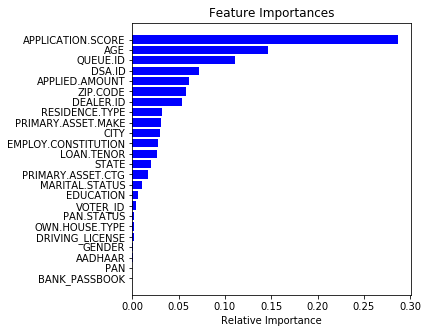

['BANK_PASSBOOK',
 'PAN',
 'AADHAAR',
 'GENDER',
 'DRIVING_LICENSE',
 'OWN.HOUSE.TYPE',
 'PAN.STATUS',
 'VOTER_ID',
 'EDUCATION',
 'MARITAL.STATUS',
 'PRIMARY.ASSET.CTG',
 'STATE',
 'LOAN.TENOR',
 'EMPLOY.CONSTITUTION',
 'CITY',
 'PRIMARY.ASSET.MAKE',
 'RESIDENCE.TYPE',
 'DEALER.ID',
 'ZIP.CODE',
 'APPLIED.AMOUNT',
 'DSA.ID',
 'QUEUE.ID',
 'AGE',
 'APPLICATION.SCORE']

In [161]:
#Gradient Boosting Machines
from sklearn.ensemble import GradientBoostingClassifier
clf2 = GradientBoostingClassifier() # n_estimators = 50 (default) # base_estimator = DecisionTreeClassifier(default)

TrainModel(clf2)
PredictModel(clf2)
featureImp(clf2)

### XG Boost


 Clf Report on train: 

              precision    recall  f1-score   support

          0       0.70      0.68      0.69      2331
          1       0.77      0.78      0.77      3100

avg / total       0.74      0.74      0.74      5431


 Accuarcy on train %:   73.8722150617

 report on validation data: 

              precision    recall  f1-score   support

          0       0.67      0.66      0.66       991
          1       0.75      0.76      0.75      1337

avg / total       0.72      0.72      0.72      2328


 accuracy on validation data in %: 71.5635738832


 CM on validation %: 


col_0,0,1
APPLICATION.STATUS,,
0,655,336
1,326,1011


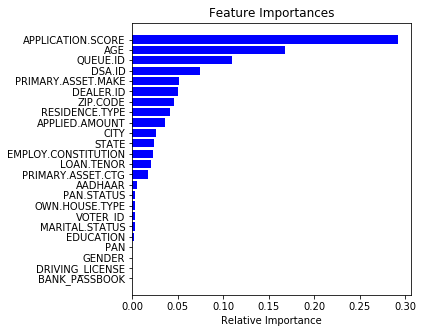

['BANK_PASSBOOK',
 'DRIVING_LICENSE',
 'GENDER',
 'PAN',
 'EDUCATION',
 'MARITAL.STATUS',
 'VOTER_ID',
 'OWN.HOUSE.TYPE',
 'PAN.STATUS',
 'AADHAAR',
 'PRIMARY.ASSET.CTG',
 'LOAN.TENOR',
 'EMPLOY.CONSTITUTION',
 'STATE',
 'CITY',
 'APPLIED.AMOUNT',
 'RESIDENCE.TYPE',
 'ZIP.CODE',
 'DEALER.ID',
 'PRIMARY.ASSET.MAKE',
 'DSA.ID',
 'QUEUE.ID',
 'AGE',
 'APPLICATION.SCORE']

In [162]:
#XG Boost
### For early stop: clf3.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="auc",eval_set=[(X_test, y_test)])
import xgboost as xgb
clf3 = xgb.XGBClassifier()    
TrainModel(clf3)
PredictModel(clf3)
featureImp(clf3)

In [65]:
# from xgboost import plot_tree
# import graphviz
# xgb.plot_tree((clf3._Booster))

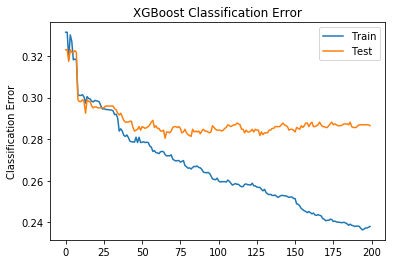

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [151]:
clf4 = xgb.XGBClassifier(n_estimators = 200) # n_estimators = 50 (default) 
# base_estimator = DecisionTreeClassifier(default)

eval_set = [(X_train, y_train), (X_valid, y_valid)]
clf4.fit(X_train, y_train, eval_metric="error", eval_set=eval_set, verbose=False)

# retrieve performance metrics
results = clf4.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)

# plot classification error
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')
plt.show()

clf4.fit(X_train, y_train, early_stopping_rounds= 25, eval_metric="error", eval_set=eval_set, verbose = False)

### Random Forest


 Clf Report on train: 

              precision    recall  f1-score   support

          0       0.98      0.99      0.99      2331
          1       0.99      0.99      0.99      3100

avg / total       0.99      0.99      0.99      5431


 Accuarcy on train %:   98.8031670042


 CM on train:


col_0,0,1
APPLICATION.STATUS,,
0,2307,24
1,41,3059



 report on validation data: 

              precision    recall  f1-score   support

          0       0.58      0.60      0.59       991
          1       0.70      0.67      0.68      1337

avg / total       0.64      0.64      0.64      2328


 accuracy on validation data in %: 64.2611683849


 CM on validation %: 


col_0,0,1
APPLICATION.STATUS,,
0,597,394
1,438,899


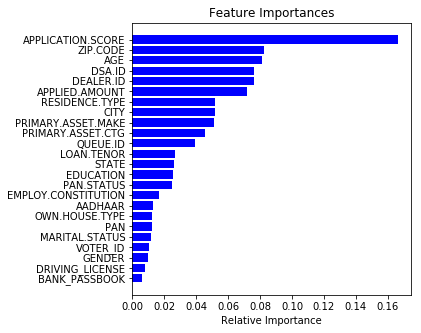

['BANK_PASSBOOK',
 'DRIVING_LICENSE',
 'GENDER',
 'VOTER_ID',
 'MARITAL.STATUS',
 'PAN',
 'OWN.HOUSE.TYPE',
 'AADHAAR',
 'EMPLOY.CONSTITUTION',
 'PAN.STATUS',
 'EDUCATION',
 'STATE',
 'LOAN.TENOR',
 'QUEUE.ID',
 'PRIMARY.ASSET.CTG',
 'PRIMARY.ASSET.MAKE',
 'CITY',
 'RESIDENCE.TYPE',
 'APPLIED.AMOUNT',
 'DEALER.ID',
 'DSA.ID',
 'AGE',
 'ZIP.CODE',
 'APPLICATION.SCORE']

In [149]:
from sklearn.ensemble import RandomForestClassifier
rF = RandomForestClassifier()
TrainModel(rF)
PredictModel(rF)
featureImp(rF)

### Decision Tree


 Clf Report on train: 

              precision    recall  f1-score   support

          0       0.99      1.00      1.00      2331
          1       1.00      0.99      1.00      3100

avg / total       1.00      1.00      1.00      5431


 Accuarcy on train %:   99.6317436936


 CM on train:


col_0,0,1
APPLICATION.STATUS,,
0,2331,0
1,20,3080



 report on validation data: 

              precision    recall  f1-score   support

          0       0.58      0.56      0.57       991
          1       0.68      0.70      0.69      1337

avg / total       0.64      0.64      0.64      2328


 accuracy on validation data in %: 64.2611683849


 CM on validation %: 


col_0,0,1
APPLICATION.STATUS,,
0,559,432
1,400,937


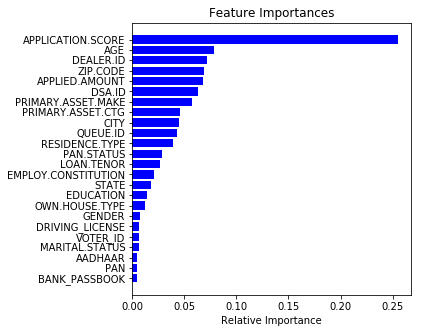

['BANK_PASSBOOK',
 'PAN',
 'AADHAAR',
 'MARITAL.STATUS',
 'VOTER_ID',
 'DRIVING_LICENSE',
 'GENDER',
 'OWN.HOUSE.TYPE',
 'EDUCATION',
 'STATE',
 'EMPLOY.CONSTITUTION',
 'LOAN.TENOR',
 'PAN.STATUS',
 'RESIDENCE.TYPE',
 'QUEUE.ID',
 'CITY',
 'PRIMARY.ASSET.CTG',
 'PRIMARY.ASSET.MAKE',
 'DSA.ID',
 'APPLIED.AMOUNT',
 'ZIP.CODE',
 'DEALER.ID',
 'AGE',
 'APPLICATION.SCORE']

In [153]:
from sklearn.tree import DecisionTreeClassifier
dT = DecisionTreeClassifier()
TrainModel(dT)
PredictModel(dT)
featureImp(dT)

### ROC - Comparsion b/w different models

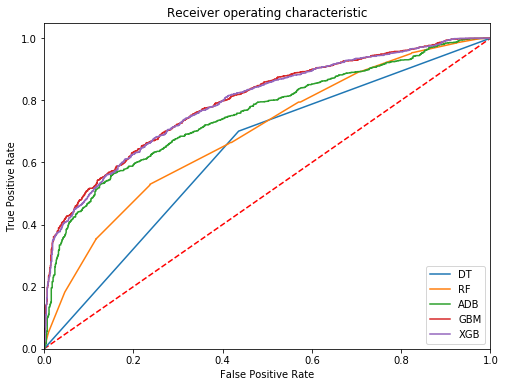

In [156]:
### Function to get the ROC Curve
def getROC(C1,C2,C3,C4,C5):
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    
    #roc1 = roc_auc_score(y_valid, C1.predict(X_valid))
    fpr1, tpr1, thresholds1 = roc_curve(y_valid, C1.predict_proba(X_valid)[:,1])
    
    #roc2 = roc_auc_score(y_valid, C2.predict(X_valid))
    fpr2, tpr2, thresholds2 = roc_curve(y_valid, C2.predict_proba(X_valid)[:,1])
    
    #roc3 = roc_auc_score(y_valid, C3.predict(X_valid))
    fpr3, tpr3, thresholds3 = roc_curve(y_valid, C3.predict_proba(X_valid)[:,1])
    
    fpr4, tpr4, thresholds4 = roc_curve(y_valid, C4.predict_proba(X_valid)[:,1])
    
    fpr5, tpr5, thresholds5 = roc_curve(y_valid, C5.predict_proba(X_valid)[:,1])
    
    plt.figure(figsize = (8,6))
    plt.plot([0, 1], [0, 1],'r--')
    plt.plot(fpr5, tpr5, label='DT' )
    plt.plot(fpr4, tpr4, label='RF' )
    plt.plot(fpr1, tpr1, label='ADB')
    plt.plot(fpr2, tpr2, label='GBM')
    plt.plot(fpr3, tpr3, label='XGB' )
   
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

getROC(clf1, clf2, clf3, rF, dT)